In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
import numpy as np
from random import randint
import math
from sklearn.utils import shuffle

In [2]:
#(X, y) = make_blobs(n_samples=300, n_features=2, centers=2,cluster_std=3.05,random_state=95) #Original Data
#X = np.c_[np.ones((X.shape[0])), X] #For absorbing bias
n_sample = 50
X = np.sort(np.random.rand(n_sample))
y =  7*X + 15 + [random.gauss(0,1.0/3.0) for i in range(n_sample)]
X = X[:,np.newaxis]
X = np.c_[np.ones((X.shape[0])), X]

NameError: name 'random' is not defined

In [39]:
con_fac = 0.0005
alpha = 0.01
epochs = 100
batchsize = 1 #same bathcsize for every algorithms
W1 = np.random.uniform(size=(X.shape[1],)) #same initial weights
W1 = tuple(W1)

In [40]:
def stochastic_gradient_descent(X,y,alpha,epochs,batchsize):
    W = []
    W = list(W1)
    flag = True
    num = epochs
    loss_list = []
    variance_loss_list =[] #for showing the fluctuations
    for epoch in range(0,epochs):
        X, y = shuffle(X, y, random_state=0)
        loss_curr = []
        i =0
        for rand_no in range(0,len(X),batchsize):
            i+=1
            X_new = X[rand_no:rand_no+batchsize]
            y_new = y[rand_no:rand_no+batchsize]
            prediction = 1.0 / (1 + np.exp(-(X_new.dot(W))))
            error = prediction - y_new
            loss = np.sum(error ** 2)
            loss_curr.append(loss)
            gradient = X_new.T.dot(error) / X_new.shape[0]
            W += -(alpha) * gradient
            if(i==200):
                loss_list.append(np.average(loss_curr))
                i=0
                loss_curr=[]
        #loss_list.append(np.average(loss_curr))
    return loss_list

In [41]:
def plot_graphs(loss_list, method_name):
    fig = plt.figure()
    plt.plot(np.arange(0, len(loss_list)), loss_list)
    fig.suptitle("Training Loss: "+ method_name)
    plt.xlabel("No. of Epochs")
    plt.ylabel("Loss")
    plt.show()

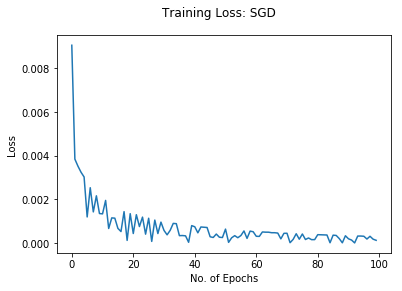

In [42]:
loss_list2 = stochastic_gradient_descent(X,y,alpha,epochs,batchsize)
plot_graphs(loss_list2,"SGD")
